In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 
df=pd.read_csv("fashion-mnist_train.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(60000, 785)

In [3]:
df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
images = df.drop('label', axis= 1).values
labels = df['label'].values
images.dtype

dtype('int64')

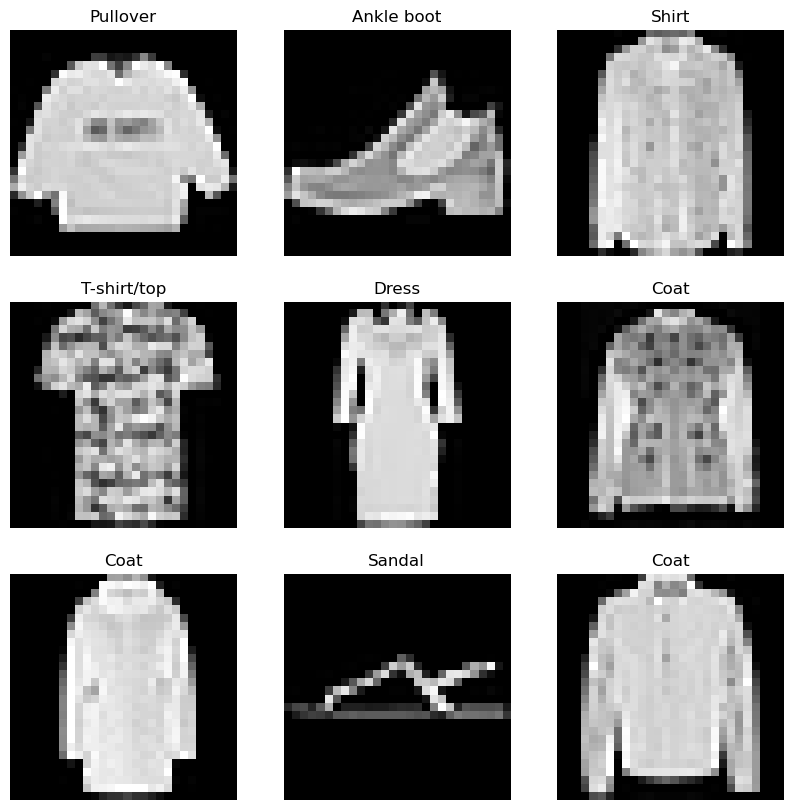

In [6]:
labels_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

def print_img(images, labels= [], img_dim= 28, rows= 3, columns= 3):
    n_img = rows * columns
    plt.figure(figsize=(10,10))
    
    for i in range(n_img):
        plt.subplot(rows, columns, i+1)
        plt.imshow(images[i].reshape(img_dim,img_dim,1), cmap= 'gray')
        if len(labels):
            plt.title(labels_name[labels[i]])
        plt.axis(False)
    plt.show()
    
print_img(images=images,labels=labels)

<b>test data</b>

In [7]:
df1=pd.read_csv("fashion-mnist_test.csv")
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
print(df1.shape)
print(df1['label'].value_counts())

(10000, 785)
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64


In [10]:
X = df.iloc[:, 1:] 
y = df.iloc[:, [0]]

X_test = df1.iloc[:, 1:] 
y_test = df1.iloc[:, [0]]

### LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X, y)

LogisticRegression()

In [12]:
y_pred=regr.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
print("Accuracy Score: ",accuracy_score(y_pred,y_test))

Accuracy Score:  0.8544


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1016
           1       0.98      0.95      0.96      1030
           2       0.76      0.77      0.77       986
           3       0.87      0.88      0.87       995
           4       0.82      0.75      0.79      1094
           5       0.88      0.95      0.91       934
           6       0.58      0.68      0.63       864
           7       0.93      0.90      0.92      1036
           8       0.95      0.93      0.94      1017
           9       0.95      0.92      0.93      1028

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.85      0.86     10000



<Axes: >

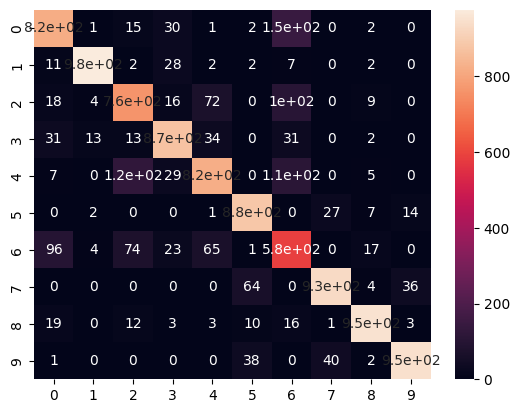

In [13]:
print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

### RANDOM FOREST (Ensemble Learning)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X, y)
y_pred2 = clf.predict(X_test)
from sklearn import metrics  
print()
 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))


Accuracy: 0.8835


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1066
           1       0.97      0.99      0.98       982
           2       0.81      0.80      0.80      1005
           3       0.93      0.90      0.91      1031
           4       0.86      0.79      0.83      1083
           5       0.95      0.97      0.96       978
           6       0.61      0.75      0.68       810
           7       0.93      0.92      0.92      1008
           8       0.98      0.95      0.96      1025
           9       0.95      0.93      0.94      1012

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.88      0.89     10000



<Axes: >

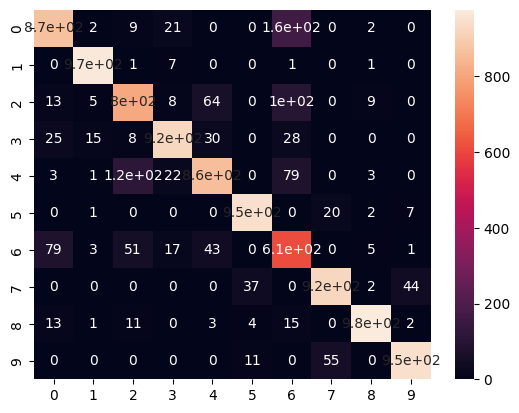

In [16]:
print(classification_report(y_pred2,y_test))
cm2=confusion_matrix(y_pred2,y_test)
sns.heatmap(cm2,annot=True)

### SUPPORT VECTOR MACHINE

#### a) SVM with RBF kernel and C=100: 

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc1=SVC(C=100.0) 
svc1.fit(X,y)
y_pred3=svc1.predict(X_test)
print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

Accuracy: 0.9056


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1058
           1       0.99      0.99      0.99      1002
           2       0.83      0.84      0.84       986
           3       0.91      0.91      0.91      1004
           4       0.86      0.85      0.85      1012
           5       0.96      0.98      0.97       980
           6       0.73      0.78      0.75       938
           7       0.96      0.95      0.95      1010
           8       0.98      0.98      0.98       999
           9       0.97      0.96      0.96      1011

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Axes: >

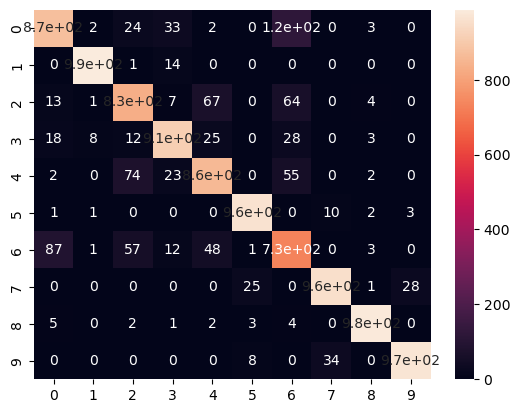

In [18]:
print(classification_report(y_pred3,y_test))
cm3=confusion_matrix(y_pred3,y_test)
sns.heatmap(cm3,annot=True)

#### b) SVM with RBF kernel (default hyperparameters):

In [19]:
svc2=SVC() 
svc2.fit(X,y)
y_pred4=svc2.predict(X_test)
print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Accuracy: 0.8921


#### c) SVM with RBF kernel and C=1000.0:

In [20]:
svc3=SVC(C=1000.0) 
svc3.fit(X,y)
y_pred5=svc3.predict(X_test)
print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred5)))

Accuracy: 0.9043


#### d) SVM with polynomial kernel and C=100:

In [21]:
svc4=SVC(kernel='poly',C=100.0) 
svc4.fit(X,y)
y_pred6=svc4.predict(X_test)
print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred6)))

Accuracy: 0.8891


### K NEAREST NEIGHBOR

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X, y)
y_pred4 = knn.predict(X_test.values)

In [21]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Model accuracy score: 0.8420


              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1150
           1       0.95      0.99      0.97       964
           2       0.77      0.75      0.76      1025
           3       0.88      0.90      0.89       967
           4       0.80      0.78      0.79      1028
           5       0.77      0.99      0.87       774
           6       0.57      0.63      0.60       900
           7       0.93      0.84      0.88      1110
           8       0.94      0.97      0.95       970
           9       0.96      0.87      0.91      1112

    accuracy                           0.84     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.84      0.84     10000



<Axes: >

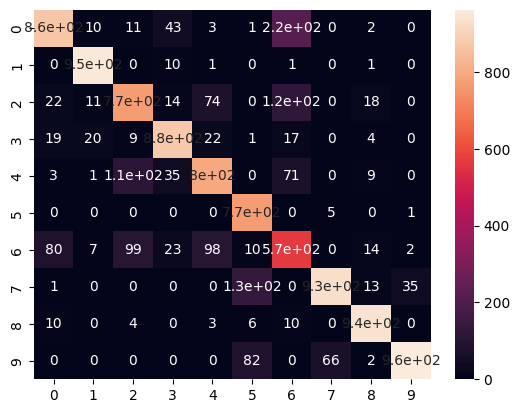

In [22]:
print(classification_report(y_pred4,y_test))
cm4=confusion_matrix(y_pred4,y_test)
sns.heatmap(cm4,annot=True)